# General Introduction?

## Data acquisition
We downloaded curated sequences for CD-box and HACA-box RNAs from variuos species from the SNOPY database (http://snoopy.med.miyazaki-u.ac.jp/).
You can find the sequences in the "SNOPY_CDBOX_curated.fasta" and the "SNOPY_HACABOX_curated.fasta" files, a common data format for DNA/RNA/Protein sequence data.
If working in JupyterLab you can easily inspect the .fasta files with the text editor by double-clicking the file in the "File Browser" pane on the left.
What do you notice? How could this be relevant later on?

## Data cleansing
Some species may have multiple copies of these RNAs and/or closely related species might have highly similar sequences. Having multiple highly similar or identical copies of a sequence can impede our models from learning a good generalization.
#### CD-HIT (http://weizhongli-lab.org/cd-hit/)
We will use cd-hit-est to cluster highly similar sequences and create sets of representative sequences for both classes. <br>
Verify cd-hit-est is installed and find out more about it by running "cd-hit-est -h". <br> You can run shell commands directly from jupyter code cells by prefixing the command with a "!".

In [1]:
!cd-hit-est -h

		====== CD-HIT version 4.8.1 (built on Sep 20 2019) ======

Usage: cd-hit-est [Options] 

Options

   -i	input filename in fasta format, required, can be in .gz format
   -j	input filename in fasta/fastq format for R2 reads if input are paired end (PE) files
 	 -i R1.fq -j R2.fq -o output_R1 -op output_R2 or
 	 -i R1.fa -j R2.fa -o output_R1 -op output_R2 
   -o	output filename, required
   -op	output filename for R2 reads if input are paired end (PE) files
   -c	sequence identity threshold, default 0.9
 	this is the default cd-hit's "global sequence identity" calculated as:
 	number of identical amino acids or bases in alignment
 	divided by the full length of the shorter sequence
   -G	use global sequence identity, default 1
 	if set to 0, then use local sequence identity, calculated as :
 	number of identical amino acids or bases in alignment
 	divided by the length of the alignment
 	NOTE!!! don't use -G 0 unless you use alignment coverage controls
 	see options -aL, -AL, -aS, -AS

#### CD-HIT parameters
Below are the parameters for our clustering runs. Run the cell please.

In [2]:
seq_identity = 0.9 # (-c)
word_size = 8 # recommended for 0.9 identity (-n)
threads = 0 # use all available CPUs (-T)
desc_len = 0 # keep description up until first white space (-d)

### Cluster CD-box sequences
Start by clustering the CD-box sequences. <br>
You can use variables in shell commands by enclosing them in curly braces i.e like this {variable}. <br>
You could define variables for the input file (-i) and output file (-o) parameters as well. <br>
Now run cd-hit-est using all of the defined parameters

In [3]:
cd_fasta_in = "SNOPY_CDBOX_curated.fasta" # (-i)
cd_clustered = "SNOPY_CDBOX_clustered.fasta" # (-o)

!cd-hit-est -i {} -o {} -c {} -n {} -T {} -d {}

Program: CD-HIT, V4.8.1 (+OpenMP), Sep 20 2019, 01:39:00
Command: cd-hit-est -i SNOPY_CDBOX_curated.fasta -o
         SNOPY_CDBOX_clustered.fasta -c 0.9 -n 8 -T 0 -d 0

Started: Mon Sep 23 16:44:48 2019
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 16
Actual number of CPUs to be used: 16

total seq: 826
longest and shortest : 421 and 29
Total letters: 81726
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 16 X 12M = 194M
Table           : 2 X 1M = 2M
Miscellaneous   : 0M
Total           : 196M

Table limit with the given memory limit:
Max number of representatives: 3167404
Max number of word counting entries: 75392543

# comparing sequences from          0  to        826
---------- new table with      680 representatives

      826  finished        680  clusters

Approximated maximum memory consumption: 197M

### Cluster HACA-box sequences
Repeat the steps for the HACA-box sequences

In [4]:
haca_fasta_in = "SNOPY_HACABOX_curated.fasta"
haca_clustered = "SNOPY_HACABOX_clustered.fasta"

!cd-hit-est -i {} -o {} -c {} -n {} -T {} -d {}

Program: CD-HIT, V4.8.1 (+OpenMP), Sep 20 2019, 01:39:00
Command: cd-hit-est -i SNOPY_HACABOX_curated.fasta -o
         SNOPY_HACABOX_clustered.fasta -c 0.9 -n 8 -T 0 -d 0

Started: Mon Sep 23 16:44:49 2019
                            Output                              
----------------------------------------------------------------
total number of CPUs in the system is 16
Actual number of CPUs to be used: 16

total seq: 571
longest and shortest : 1004 and 42
Total letters: 81189
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 16 X 12M = 196M
Table           : 2 X 1M = 2M
Miscellaneous   : 0M
Total           : 198M

Table limit with the given memory limit:
Max number of representatives: 2547634
Max number of word counting entries: 75156504

# comparing sequences from          0  to        571
---------- new table with      492 representatives

      571  finished        492  clusters

Approximated maximum memory consumption:

# Data inspection

## Read in the sequences
We are now ready to read in the two sets of representative sequences. <br>
The output of cd-hit-est are .fasta files again. We can use the "parse" function from the SeqIO module from Biopython (https://biopython.org/wiki/SeqIO) to read sequences and identifiers from the fasta file.
(Since we are only dealing with two files following exactly the same format you could also easily roll your own fasta reader.) <br>
The pandas library is a powerful friend when handling data (https://pandas-docs.github.io/pandas-docs-travis/index.html).<br>
Create two pandas DataFrames (for each class) with the identifier as index and one column named "Seq" for the sequence. <br>
(You could f.e. put all sequences into a dictionary, which can then be read into a pandas DataFrame)<br> 


In [5]:
# read in seqs into two dicts
from Bio import SeqIO # to read fasta

dict_cd = {record.id: str().upper() for record in SeqIO.parse()}
dict_haca = {}

In [6]:
# create two DataFrames from the dicts
import pandas as pd

df_cd = pd.DataFrame.from_dict(dict_cd, orient="index", columns=["Seq"])
df_haca = 

In [7]:
df_cd

Seq
Arabidopsis_thaliana300001_SnoR1b      GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...
Arabidopsis_thaliana300003_SnoR10-1    AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...
Arabidopsis_thaliana300004_SnoR10-2    AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...
Arabidopsis_thaliana300006_SnoR101     GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...
Arabidopsis_thaliana300007_SnoR102     AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...
Arabidopsis_thaliana300010_SnoR105     AGGGGATATGATGAATGGTAAAAACTCGCTTATATTGCGAGAAGAG...
Arabidopsis_thaliana300011_SnoR106     GAAAAGATGGGGTTGAGAATGTGATTTTGCTCTTCTTGATTCAAAC...
Arabidopsis_thaliana300012_SnoR107     AAATCTCTGCTTTTCACTGGGTATATATTAATTAGTCGTCTCTCTC...
Arabidopsis_thaliana300013_SnoR108     AGTTATAGGGGAAATGAGGAATGGTTATAATCTCGCTTTAATGCGT...
Arabidopsis_thaliana300015_SnoR11      TGGTTTTGAAGATAGGTTACCTTAATTCTCGGTTTATTAAGTGGAT...
Arabidopsis_thaliana300019_SnoR12-1a   TGAGGATGACGAAAAAATCATTCGGATTCCCTTTGAATTCCTCCGG...
Arabidopsis_thaliana300020_SnoR12-2    TGAGGGTGATGAAAAAAATCATTCGGATTCCCAATGATTCCCTTAC...
Arabidopsis_thaliana300021_SnoR12-1b   TGATGGTAAAAGATGACGAAAAAAATCGTTCGGATTCCCTTTGAAT...
Arabidopsis_thaliana300023_SnoR13-2    AGATCAGGTGATGAGGTAATACTGCAACAATATGATGGAGTAATCT...
Arabidopsis_thaliana300024_SnoR14-1    CGAGGTGACGATAGAAATTCACAGGTCTGTCAATCCACTGATATAT...
Arabidopsis_thaliana300025_SnoR14-2    GAAGTGACGATAAAGAATTCACAGTCTGTCAATCCACTGACAACAT...
Arabidopsis_thaliana300026_SnoR15      GCAGATGATGATTATCATAAAACAAATGGGTAATTTGCGACTGATA...
Arabidopsis_thaliana300027_SnoR16-1    GCAAATGATGAGTAGAATCTTATCCTACACACAGATGTATCAGTGT...
Arabidopsis_thaliana300028_SnoR16-2    GCAAATGAAGAATTGATTAATTTATGCTTAACCACTGATGAACAGT...
Arabidopsis_thaliana300029_SnoR17      CATAGTGATGAATTATATCACAATTGTCACTACCTCTGAGGCATAT...
Arabidopsis_thaliana300030_SnoR18a     AGATATGATGATGGAATTAGATTTCCCTATTGGTTTGATCGCCGTT...
Arabidopsis_thaliana300031_SnoR18b     TGAAGTGATGATTGAACTTTGTTTCCCTATTGGTTTGATCGCCGAT...
Arabidopsis_thaliana300032_SnoR19-1    AACAGTGATGAGTCAGTTTACAGACCTGTAATGATTGCGGTAATGA...
Arabidopsis_thaliana300034_SnoR20-1    GCCAGTGATGATTAGATTCAATGGTTGCTGAACATTCAATGTTGAA...
Arabidopsis_thaliana300035_SnoR20-2    AGGCTGATGAAGATTAGATATTAATGGTTACTGAAATTTCAATAAG...
Arabidopsis_thaliana300036_SnoR21b     GGCTGTGATGATTGAGAATGTCATGCACCACTCTGATTTTTTGTGC...
Arabidopsis_thaliana300041_SnoR22-2    ATGAGCTGATGATGAAAAAAAACAATTATCTTAGCGGATTTCAGTG...
Arabidopsis_thaliana300042_SnoR23-2    GATGCAATGATGAGATAAAAGCACGAAGAGTGTGAGAAGAGCAGTG...
Arabidopsis_thaliana300044_SnoR23-1    TGCGATGATGATAAAATAGCACGAAGGTGCGTGAAGGGCAGTGGAC...
Arabidopsis_thaliana300045_SnoR24c     TTAGCTGTGATGAGAAAGCTAACACGTAAGAAGAAGTACTCCTTTG...
...                                                                                  ...
Saccharomyces_cerevisiae300027_snR57   AAGCGTGATTATAAAAAATGATTTAAATATTTTTCTGAGGAAGTAT...
Saccharomyces_cerevisiae300029_snR39b  ATTTAGTGATGATACTGCCGATTCTGGCATTCCAAAAAGTGACTAG...
Saccharomyces_cerevisiae300030_snR71   GTTATATGATGATAACCTTCTCAGCTCACTCAGATCTTTTGATATG...
Saccharomyces_cerevisiae300032_snR68   TATCATGATGAGCATTTATTTTACTGCGTTATCGTATTGACGGGGG...
Saccharomyces_cerevisiae300033_snR67   TAACATGATGACTAAGTTGTCGCCCCAAGCGGATCTTTGAAATGAC...
Saccharomyces_cerevisiae300034_snR53   TTTGATGATGATTACACTCCATGCTAATCATGAACGTGTTCGATGT...
Saccharomyces_cerevisiae300036_snR69   GTTTATGATGAGACCACGTCCTTAGTGACAATGCTATAAACCCAGC...
Saccharomyces_cerevisiae300039_snR47   ATATATGATGATATCCTATAACAACAACAACATGAATTTCTTCGTC...
Saccharomyces_cerevisiae300045_snR50   TTAGAATGATGAAAGAGGTAGCAATTTGCAGCAGATTTTTCGTGAT...
Saccharomyces_cerevisiae300046_snR56   TTAACATGATGAAAAAATATATTAACACAGACCTGTACTGAACTTT...
Saccharomyces_cerevisiae300050_snR52   TACTATGATGAATGACATTAGCGTGAACAATCTCTGATACAAAATC...
Saccharomyces_cerevisiae300051_snR13   AGGAAGTTTTTTCCTTTTTATATGATGAATATGAGTGCATTTGGCT...
Saccharomyces_cerevisiae300052_snR63   TTTAATGATGAAGATTTTAATTTTCCGTTGGTCTATTAAGAACAGA...
Saccharomyces_cerevisiae300053_U14     TCACGGTGATGAAAGACTGGTTCCTTAACATTCGCAGTTTC

Add a column "Label" to both DataFrames containing the respective class label "CD-box" or "HACA-box"

In [8]:
df_cd["Label"] = "CD-box"
df_cd

Seq  \
Arabidopsis_thaliana300001_SnoR1b      GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...   
Arabidopsis_thaliana300003_SnoR10-1    AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...   
Arabidopsis_thaliana300004_SnoR10-2    AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...   
Arabidopsis_thaliana300006_SnoR101     GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...   
Arabidopsis_thaliana300007_SnoR102     AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...   
Arabidopsis_thaliana300010_SnoR105     AGGGGATATGATGAATGGTAAAAACTCGCTTATATTGCGAGAAGAG...   
Arabidopsis_thaliana300011_SnoR106     GAAAAGATGGGGTTGAGAATGTGATTTTGCTCTTCTTGATTCAAAC...   
Arabidopsis_thaliana300012_SnoR107     AAATCTCTGCTTTTCACTGGGTATATATTAATTAGTCGTCTCTCTC...   
Arabidopsis_thaliana300013_SnoR108     AGTTATAGGGGAAATGAGGAATGGTTATAATCTCGCTTTAATGCGT...   
Arabidopsis_thaliana300015_SnoR11      TGGTTTTGAAGATAGGTTACCTTAATTCTCGGTTTATTAAGTGGAT...   
Arabidopsis_thaliana300019_SnoR12-1a   TGAGGATGACGAAAAAATCATTCGGATTCCCTTTGAATTCCTCCGG...   
Arabidopsis_thaliana300020_SnoR12-2    TGAGGGTGATGAAAAAAATCATTCGGATTCCCAATGATTCCCTTAC...   
Arabidopsis_thaliana300021_SnoR12-1b   TGATGGTAAAAGATGACGAAAAAAATCGTTCGGATTCCCTTTGAAT...   
Arabidopsis_thaliana300023_SnoR13-2    AGATCAGGTGATGAGGTAATACTGCAACAATATGATGGAGTAATCT...   
Arabidopsis_thaliana300024_SnoR14-1    CGAGGTGACGATAGAAATTCACAGGTCTGTCAATCCACTGATATAT...   
Arabidopsis_thaliana300025_SnoR14-2    GAAGTGACGATAAAGAATTCACAGTCTGTCAATCCACTGACAACAT...   
Arabidopsis_thaliana300026_SnoR15      GCAGATGATGATTATCATAAAACAAATGGGTAATTTGCGACTGATA...   
Arabidopsis_thaliana300027_SnoR16-1    GCAAATGATGAGTAGAATCTTATCCTACACACAGATGTATCAGTGT...   
Arabidopsis_thaliana300028_SnoR16-2    GCAAATGAAGAATTGATTAATTTATGCTTAACCACTGATGAACAGT...   
Arabidopsis_thaliana300029_SnoR17      CATAGTGATGAATTATATCACAATTGTCACTACCTCTGAGGCATAT...   
Arabidopsis_thaliana300030_SnoR18a     AGATATGATGATGGAATTAGATTTCCCTATTGGTTTGATCGCCGTT...   
Arabidopsis_thaliana300031_SnoR18b     TGAAGTGATGATTGAACTTTGTTTCCCTATTGGTTTGATCGCCGAT...   
Arabidopsis_thaliana300032_SnoR19-1    AACAGTGATGAGTCAGTTTACAGACCTGTAATGATTGCGGTAATGA...   
Arabidopsis_thaliana300034_SnoR20-1    GCCAGTGATGATTAGATTCAATGGTTGCTGAACATTCAATGTTGAA...   
Arabidopsis_thaliana300035_SnoR20-2    AGGCTGATGAAGATTAGATATTAATGGTTACTGAAATTTCAATAAG...   
Arabidopsis_thaliana300036_SnoR21b     GGCTGTGATGATTGAGAATGTCATGCACCACTCTGATTTTTTGTGC...   
Arabidopsis_thaliana300041_SnoR22-2    ATGAGCTGATGATGAAAAAAAACAATTATCTTAGCGGATTTCAGTG...   
Arabidopsis_thaliana300042_SnoR23-2    GATGCAATGATGAGATAAAAGCACGAAGAGTGTGAGAAGAGCAGTG...   
Arabidopsis_thaliana300044_SnoR23-1    TGCGATGATGATAAAATAGCACGAAGGTGCGTGAAGGGCAGTGGAC...   
Arabidopsis_thaliana300045_SnoR24c     TTAGCTGTGATGAGAAAGCTAACACGTAAGAAGAAGTACTCCTTTG...   
...                                                                                  ...   
Saccharomyces_cerevisiae300027_snR57   AAGCGTGATTATAAAAAATGATTTAAATATTTTTCTGAGGAAGTAT...   
Saccharomyces_cerevisiae300029_snR39b  ATTTAGTGATGATACTGCCGATTCTGGCATTCCAAAAAGTGACTAG...   
Saccharomyces_cerevisiae300030_snR71   GTTATATGATGATAACCTTCTCAGCTCACTCAGATCTTTTGATATG...   
Saccharomyces_cerevisiae300032_snR68   TATCATGATGAGCATTTATTTTACTGCGTTATCGTATTGACGGGGG...   
Saccharomyces_cerevisiae300033_snR67   TAACATGATGACTAAGTTGTCGCCCCAAGCGGATCTTTGAAATGAC...   
Saccharomyces_cerevisiae300034_snR53   TTTGATGATGATTACACTCCATGCTAATCATGAACGTGTTCGATGT...   
Saccharomyces_cerevisiae300036_snR69   GTTTATGATGAGACCACGTCCTTAGTGACAATGCTATAAACCCAGC...   
Saccharomyces_cerevisiae300039_snR47   ATATATGATGATATCCTATAACAACAACAACATGAATTTCTTCGTC...   
Saccharomyces_cerevisiae300045_snR50   TTAGAATGATGAAAGAGGTAGCAATTTGCAGCAGATTTTTCGTGAT...   
Saccharomyces_cerevisiae300046_snR56   TTAACATGATGAAAAAATATATTAACACAGACCTGTACTGAACTTT...   
Saccharomyces_cerevisiae300050_snR52   TACTATGATGAATGACATTAGCGTGAACAATCTCTGATACAAAATC...   
Saccharomyces_cerevisiae300051_snR13   AGGAAGTTTTTTCCTTTTTATATGATGAATATGAGTGCATTTGGCT...   
Saccharomyces_cerevisiae300052_snR63 

In [9]:
df_haca["Label"] = "HACA-box"
df_haca

Seq  \
Arabidopsis_thaliana300005_SnoR100       GAATGATTGTAGCATGGTACTGTGCACGGAAACTGAATCATGGGTT...   
Arabidopsis_thaliana300008_SnoR103       CGCAAGTATGTGTTTCTGCTGTAAATATGGACGTATAATGATATGT...   
Arabidopsis_thaliana300009_SnoR104       GGGGAGCATCAAAGAGTTGTGATGTTATCTGATACAATCTTCCTAA...   
Arabidopsis_thaliana300014_SnoR109       CGGCTGTAGCTAGATTGAATAAGAAGCTATCTGGCCGGTGGTCGCG...   
Arabidopsis_thaliana300016_SnoR110       GCTAAATTTAGTGCCGCCTTGTCTTTTCAAGTTTTCTCCTTTTGTA...   
Arabidopsis_thaliana300017_SnoR111       AAAATGGGGCAAGAGAGAGTAACGGTGTCTCTGAGTCCTTGATGAA...   
Arabidopsis_thaliana300018_SnoR112       TTGGATTGGAAATATGTTCCTTATCGGCTCGTTCAATATTGAAGCA...   
Arabidopsis_thaliana300080_SnoR5a        GCCTATGGTATCTGATGTCCAAAGTTTGATAATTGTGTTTGGACAT...   
Arabidopsis_thaliana300099_SnoR72        GAATCTCCTACAGGTCTTGCGACACAGTTTGCTTTTGATTTGATAA...   
Arabidopsis_thaliana300104_SnoR73        GTGTTGGTATTATATTCTTGTACCCACACTCTACAATTGATAAGCT...   
Arabidopsis_thaliana300105_SnoR74-2      GCAGGGTTCTGTTTTATATAACAGACCTCACGTAAATGTCAGGAAA...   
Arabidopsis_thaliana300106_SnoR74-1      GAAAAAGCAGAGTTCTGTTGCAATTTGACAGATCTCACGTATACTT...   
Arabidopsis_thaliana300108_h-127bSnoR76  GATTTTTTTATAATTTGCAGAGTTGTTCTTCCTTCTTTGCTGATTA...   
Arabidopsis_thaliana300109_SnoR77        AGGCAACCTACTTGTTAATAAAACAATGACATGAGAGGTGTTTAAC...   
Arabidopsis_thaliana300113_SnoR78-1      TGCCAAATTTGTGTCGGAAGATGACAAGATTGATTTTGCCTCTCCA...   
Arabidopsis_thaliana300114_SnoR78-2      GCAAGATAGGTTATAATTTGTACCAATTTTGTGTCGGAAGATGACA...   
Arabidopsis_thaliana300115_SnoR79        GTTTGAACTGTTACATCTCTGGTAAAGAAAAAAGAGAGAAGGAAAG...   
Arabidopsis_thaliana300118_SnoR80        ACCAATTCTGAGGGATAAAAACAGTTCCTTCAGGTATAATGGCTTG...   
Arabidopsis_thaliana300119_SnoR81        TATATCTCTCCTGACATCGAATAATTCAGATATTAATGCTTGTGTT...   
Arabidopsis_thaliana300120_SnoR82        GCTTCTTTGATTGGGTCAAGATATTCACGATCCAATCAATTTTATG...   
Arabidopsis_thaliana300121_SnoR83        ATCCCAGCTAAGTTTGATGAAGTACTTATCTGATTCATGTGAGGCC...   
Arabidopsis_thaliana300122_SnoR84        CATCTCTGCTCAATCCTTACACCAAATTTTGATGGTATAAGAGGAT...   
Arabidopsis_thaliana300124_SnoR86        GAGCAATGACGTCAAAATAAAAATGGCGTAAGTTGCCTTGAAGGTT...   
Arabidopsis_thaliana300125_SnoR87          CGAGCTGAAATGTGCTCTCACTTTTGTGGCTGCTAACTGTACACAGT   
Arabidopsis_thaliana300126_SnoR88-2      GATTCGTTCCCTTGAAGCAATATTAATCGTGTTGCTCTCGTTCTCT...   
Arabidopsis_thaliana300127_SnoR88-1      GATTCGTTCCCTTGAAGCAAAATCAATCGTGTTGCTTTCGTTATTT...   
Arabidopsis_thaliana300131_SnoR90        GAGTCTTTTGGCTATGATTAGCTTTGAATGCTAATGGACTGACATC...   
Arabidopsis_thaliana300132_SnoR91               AATTTCTCATCTTTCCAGATGATTTTCTTGAATGGTACATTT   
Arabidopsis_thaliana300133_SnoR92        ACGGGTTTCTTTGTGCTTTCTCTGTGTTTTGTGTATTTTTTATACT...   
Arabidopsis_thaliana300134_SnoR93        GTGAGATTCAATTTTCGATCTAATGTTACTAATTTTAGCCTTTAGG...   
...                                                                                    ...   
Mus_musculus300900_SNORA62               CCTGCACATTGTTAGAGCTTGGAGTTGAGGTCACACGCTGGTCGAT...   
Saccharomyces_cerevisiae300001_snR85     TACTAGCACATATGTCAAATTCCTAATTAACGTTTTTTATATTCAT...   
Saccharomyces_cerevisiae300002_snR84     ATTGCACAACTTAAGTTTGTCGAGGATCATTTTTTTGAACTGAATC...   
Saccharomyces_cerevisiae300005_snR43     CACTCCTGTTTCTGCCTCATGTCTTTTAAAACGCTTCCACGGGACA...   
Saccharomyces_cerevisiae300006_snR32     AACATCATAATTATATCGCGAATGTACTACTAGTATATGCAGTTTT...   
Saccharomyces_cerevisiae300007_snR81     AGGTTAGGGACTGCAAAAGAAGCGGCGAGGCAGCCCACATCAAGTG...   
Saccharomyces_cerevisiae300009_snR36     TTGCCCTGTGCCTCGCTCGGTTGTTAATTGCCAATATTACGATCTT...   
Saccharomyces_cerevisiae300010_snR49     ATGGGACTTTATCTCCATGACTATGCCATTTCTAGGTAGCCTATGG...   
Saccharomyces_cerevisiae300020_snR82     ATGGCTCTTCAACACATTTCAACATGTTCAAGTAATTTGTGTTAGT...   
Saccharomyces_cerevisiae300021_snR189    AACAAAATAATTTACATTCCAAGGACCGGTATTATTGTAGGGGATT...   
Saccharomyces_cerevisiae300022_snR42     ATAACAATTTGTGATGCTTTAGGGAGCCTATTGTTTGATGGTTTAT...   
Saccharomyces_cerevisiae300023_snR10     AACG

Combine both DataFrames to create our complete data set. (Save the resulting DataFrame to a csv file)

In [10]:
df_all = 
df_all

Seq  \
Arabidopsis_thaliana300001_SnoR1b      GGCGAGGATGAATAATGCTAAATTTCTGACACCTCTTGTATGAGGA...   
Arabidopsis_thaliana300003_SnoR10-1    AGAAATGATGAGAAATCAGATAAATCTTAGGACACCTTCTGACACA...   
Arabidopsis_thaliana300004_SnoR10-2    AAATATGATGATAATAATCAGTAAATATCTTAGGACACCTTCTGAC...   
Arabidopsis_thaliana300006_SnoR101     GGGATACACTTGATCTCTGAACTTCACAGGTAAGTTCGCTTGTTGA...   
Arabidopsis_thaliana300007_SnoR102     AGAAGTCAATAGACCAGACATTGTGGTAACACTCTCTTTCATGGCA...   
Arabidopsis_thaliana300010_SnoR105     AGGGGATATGATGAATGGTAAAAACTCGCTTATATTGCGAGAAGAG...   
Arabidopsis_thaliana300011_SnoR106     GAAAAGATGGGGTTGAGAATGTGATTTTGCTCTTCTTGATTCAAAC...   
Arabidopsis_thaliana300012_SnoR107     AAATCTCTGCTTTTCACTGGGTATATATTAATTAGTCGTCTCTCTC...   
Arabidopsis_thaliana300013_SnoR108     AGTTATAGGGGAAATGAGGAATGGTTATAATCTCGCTTTAATGCGT...   
Arabidopsis_thaliana300015_SnoR11      TGGTTTTGAAGATAGGTTACCTTAATTCTCGGTTTATTAAGTGGAT...   
Arabidopsis_thaliana300019_SnoR12-1a   TGAGGATGACGAAAAAATCATTCGGATTCCCTTTGAATTCCTCCGG...   
Arabidopsis_thaliana300020_SnoR12-2    TGAGGGTGATGAAAAAAATCATTCGGATTCCCAATGATTCCCTTAC...   
Arabidopsis_thaliana300021_SnoR12-1b   TGATGGTAAAAGATGACGAAAAAAATCGTTCGGATTCCCTTTGAAT...   
Arabidopsis_thaliana300023_SnoR13-2    AGATCAGGTGATGAGGTAATACTGCAACAATATGATGGAGTAATCT...   
Arabidopsis_thaliana300024_SnoR14-1    CGAGGTGACGATAGAAATTCACAGGTCTGTCAATCCACTGATATAT...   
Arabidopsis_thaliana300025_SnoR14-2    GAAGTGACGATAAAGAATTCACAGTCTGTCAATCCACTGACAACAT...   
Arabidopsis_thaliana300026_SnoR15      GCAGATGATGATTATCATAAAACAAATGGGTAATTTGCGACTGATA...   
Arabidopsis_thaliana300027_SnoR16-1    GCAAATGATGAGTAGAATCTTATCCTACACACAGATGTATCAGTGT...   
Arabidopsis_thaliana300028_SnoR16-2    GCAAATGAAGAATTGATTAATTTATGCTTAACCACTGATGAACAGT...   
Arabidopsis_thaliana300029_SnoR17      CATAGTGATGAATTATATCACAATTGTCACTACCTCTGAGGCATAT...   
Arabidopsis_thaliana300030_SnoR18a     AGATATGATGATGGAATTAGATTTCCCTATTGGTTTGATCGCCGTT...   
Arabidopsis_thaliana300031_SnoR18b     TGAAGTGATGATTGAACTTTGTTTCCCTATTGGTTTGATCGCCGAT...   
Arabidopsis_thaliana300032_SnoR19-1    AACAGTGATGAGTCAGTTTACAGACCTGTAATGATTGCGGTAATGA...   
Arabidopsis_thaliana300034_SnoR20-1    GCCAGTGATGATTAGATTCAATGGTTGCTGAACATTCAATGTTGAA...   
Arabidopsis_thaliana300035_SnoR20-2    AGGCTGATGAAGATTAGATATTAATGGTTACTGAAATTTCAATAAG...   
Arabidopsis_thaliana300036_SnoR21b     GGCTGTGATGATTGAGAATGTCATGCACCACTCTGATTTTTTGTGC...   
Arabidopsis_thaliana300041_SnoR22-2    ATGAGCTGATGATGAAAAAAAACAATTATCTTAGCGGATTTCAGTG...   
Arabidopsis_thaliana300042_SnoR23-2    GATGCAATGATGAGATAAAAGCACGAAGAGTGTGAGAAGAGCAGTG...   
Arabidopsis_thaliana300044_SnoR23-1    TGCGATGATGATAAAATAGCACGAAGGTGCGTGAAGGGCAGTGGAC...   
Arabidopsis_thaliana300045_SnoR24c     TTAGCTGTGATGAGAAAGCTAACACGTAAGAAGAAGTACTCCTTTG...   
...                                                                                  ...   
Mus_musculus300900_SNORA62             CCTGCACATTGTTAGAGCTTGGAGTTGAGGTCACACGCTGGTCGAT...   
Saccharomyces_cerevisiae300001_snR85   TACTAGCACATATGTCAAATTCCTAATTAACGTTTTTTATATTCAT...   
Saccharomyces_cerevisiae300002_snR84   ATTGCACAACTTAAGTTTGTCGAGGATCATTTTTTTGAACTGAATC...   
Saccharomyces_cerevisiae300005_snR43   CACTCCTGTTTCTGCCTCATGTCTTTTAAAACGCTTCCACGGGACA...   
Saccharomyces_cerevisiae300006_snR32   AACATCATAATTATATCGCGAATGTACTACTAGTATATGCAGTTTT...   
Saccharomyces_cerevisiae300007_snR81   AGGTTAGGGACTGCAAAAGAAGCGGCGAGGCAGCCCACATCAAGTG...   
Saccharomyces_cerevisiae300009_snR36   TTGCCCTGTGCCTCGCTCGGTTGTTAATTGCCAATATTACGATCTT...   
Saccharomyces_cerevisiae300010_snR49   ATGGGACTTTATCTCCATGACTATGCCATTTCTAGGTAGCCTATGG...   
Saccharomyces_cerevisiae300020_snR82   ATGGCTCTTCAACACATTTCAACATGTTCAAGTAATTTGTGTTAGT...   
Saccharomyces_cerevisiae300021_snR189  AACAAAATAATTTACATTCCAAGGACCGGTATTATTGTAGGGGATT...   
Saccharomyces_cerevisiae300022_snR42   ATAACAATTTGTGATGCTTTAGGGAGCCTATTGTTTGATGGTTTAT...   
Saccharomyces_cerevisiae300023_snR10   AACGCAAATTTAACAGCCATTCGTAACACGTACAGTATCTCGTCGA...   
Saccharomyces_cerevisiae300028_snR80 

Let's add some features to generate a first impression of our data. <br>
Add a column "Length" containing the length of the sequence

In [11]:
df_all["Length"] = df_all.Seq.map(len)

Two commonly used features for DNA sequences are the "GC content" and the "ATGC ratio".<br>
The GC content is the percentage of "G"s or "C"s in the whole sequence. <br>
The ATGC ratio is the ratio of "A"s and "T"s to "G"s and "C"s. <br>
Create two columns "GC_content" and "ATGC_ratio" containing the respective feature.

In [12]:
df_all["GC_content"] = df_all.Seq.map()
df_all["ATGC_ratio"] = df_all.Seq.map()

Generate a first overview of the data using the DataFrame's describe() method

In [13]:
df_all.describe()

Length   GC_content   ATGC_ratio
count  1172.000000  1172.000000  1172.000000
mean    118.895051     0.417389     1.472921
std      57.874464     0.073975     0.449738
min      29.000000     0.220779     0.380435
25%      79.000000     0.364123     1.149734
50%     115.000000     0.415485     1.406829
75%     135.250000     0.465174     1.746324
max    1004.000000     0.724409     3.529412

We are also interested in the differences between our classes.<br>
<b>Generate a class-wise description using groupby() and describe()<b>

In [14]:
df_all.

Length                                                            \
          count        mean        std   min    25%    50%    75%     max   
Label                                                                       
CD-box    680.0  100.876471  50.334428  29.0   73.0   82.0  101.0   421.0   
HACA-box  492.0  143.798780  58.424932  42.0  128.0  134.0  140.0  1004.0   

         GC_content            ...                     ATGC_ratio            \
              count      mean  ...       75%       max      count      mean   
Label                          ...                                            
CD-box        680.0  0.404823  ...  0.450704  0.711340      680.0  1.550262   
HACA-box      492.0  0.434756  ...  0.483737  0.724409      492.0  1.366027   

                                                                      
               std       min       25%       50%       75%       max  
Label                                                                 
CD-box    0.465136  0.405797  1.218750  1.485667  1.821429  3.529412  
HACA-box  0.404303  0.380435  1.067243  1.316986  1.650543  3.138889  

[2 rows x 24 columns]

To get a visual impression of the distribution of the features in our data we can use the pairplot() function form the seaborn visualization library (https://seaborn.pydata.org/) <br>
Generate a pair plot for the DataFrame. What is easily visible using the plot?

In [15]:
import seaborn as sns # Seaborn visualization library (for pairs plot)
sns.pairplot(df_all)

Again we are also interested in the differences between the two classes.<br>
<b>Generate a pair plot colored by class (Label) (https://seaborn.pydata.org/generated/seaborn.pairplot.html)<b>

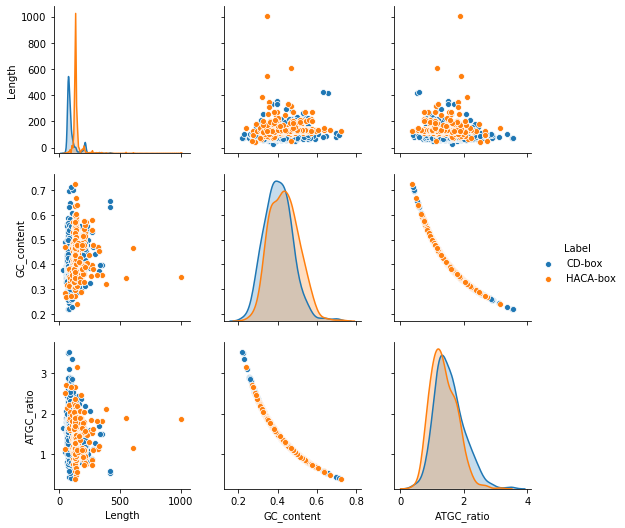

In [16]:
sns.pairplot(df_all, hue = 'Label')

Let's save the DataFrame to a csv in case we need it later

In [17]:
df_all.to_csv("df_ALL.csv")

We already noticed above (using describe) that we have a few more CD-box sequences than HACA-box sequences. <br>
To balance our dataset we can use the "resample" function from scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html).<br>
<b>Downsample the larger class to the size of the smaller class and create a new balanced DataFrame.</b>

In [18]:
from sklearn.utils import resample
rnd_seed=42

# We are going to remove the randomly selected sequences
df_cd_ds = resample() # sample without replacement
                      # class size difference
                      # fix seed for reproducible results

df_balanced =  # drop the selected sequences
df_balanced.Label.value_counts()

CD-box      492
HACA-box    492
Name: Label, dtype: int64

The sampling procedure should leave us with a representative sample, but let us check that we didn't end up with a skewed sample anyways.<br>
<b>Use groupby(), describe() and element-wise substraction to analyse the differences between the balanced and the original data.</b>

In [19]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df_balanced.groupby("Label").describe() - df_all.groupby("Label").describe()

Length                                                 GC_content                                                           ATGC_ratio                                                            
          count      mean       std   min   25%  50%   75%  max      count     mean      std  min       25%       50%       75%  max      count      mean       std  min       25%       50%       75%  max
Label                                                                                                                                                                                                      
CD-box   -188.0  1.038164  1.554895  22.0  0.75  0.0  1.25  0.0     -188.0  0.00375  0.00058  0.0  0.003204  0.004344  0.002373  0.0     -188.0 -0.024679 -0.011034  0.0 -0.011619 -0.026528 -0.025275  0.0
HACA-box    0.0  0.000000  0.000000   0.0  0.00  0.0  0.00  0.0        0.0  0.00000  0.00000  0.0  0.000000  0.000000  0.000000  0.0        0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [20]:
pd.reset_option("display")

Let's save the balanced DataFrame to a csv in case we need it later

In [21]:
df_balanced.to_csv("df_balanced.csv")

## A first simple classifier
We already noticed using the pair plot that the sequence length distributions of the two classes seem to be quite different. Can we train a simple classifier with only the features we already constructed? The performance of this classifier can then be used to establish a baseline for our upcoming more complex models (i.e CNNs).<br>
Wait! First things first. We need to split the data into a set used for training and a set used for testing.<br>
<b>Use sklearn's train_test_split to create sets of training and test data and corresponding sets of labels. Use an 80/20 split.</b>

In [22]:
from sklearn.model_selection import train_test_split
rnd_seed=42

xTrain, xTest, yTrain, yTest =

In [23]:
print(yTrain.value_counts())
print(yTest.value_counts())

HACA-box    394
CD-box      393
Name: Label, dtype: int64
CD-box      99
HACA-box    98
Name: Label, dtype: int64


Now we are going to train a "Naive Bayes" classifier using our features (https://scikit-learn.org/stable/modules/naive_bayes.html) <br>
<b>Fit a GaussianNB classifier to the training dataset and generate predictions for the test dataset. Does it make sense to include all of the features?<b>

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() # create classifier
gnb.fit() # train using only length and GC
yPred = gnb.predict() # generate predictions

yPred

array(['HACA-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'HACA-box',
       'HACA-box', 'HACA-box', 'HACA-box', 'CD-box', 'CD-box', 'HACA-box',
       'HACA-box', 'HACA-box', 'HACA-box', 'CD-box', 'CD-box', 'HACA-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'HACA-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'HACA-box', 'HACA-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box',
       'HACA-box', 'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'HACA-box',
       'CD-box', 'HACA-box', 'HACA-box', 'HACA-box', 'HACA-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box',
       'CD-box', 'CD-box', 'CD-box', 'HACA-box', 'CD-box', 'CD-box',
       'CD-box', 'HACA-box', 'HACA-box', 'CD-box', 'CD-box', 'CD-box',
       'HACA-box', 'CD-box', 'CD-box', 'CD-box', 'CD-box', 'HACA-

To assess the quality of our prediction scikit-learn provides us with many different metrics. (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)<br>
<b>Use sklearn.metrics to print out the accuracy_score and the matthews_corrcoef for the generated predictions.</b> (Are these good choices for our problem?)

In [25]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(yTest, yPred))
print("MCC:", metrics.matthews_corrcoef(yTest, yPred))

Accuracy: 0.700507614213198
MCC: 0.4065869094085616


Scikit-learn also provides a classification report which includes commonly used metrics (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)<br>
<b>Print out the classification report for the predictions<b>

In [26]:
from sklearn.metrics import classification_report

print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

      CD-box       0.67      0.79      0.73        99
    HACA-box       0.74      0.61      0.67        98

   micro avg       0.70      0.70      0.70       197
   macro avg       0.71      0.70      0.70       197
weighted avg       0.71      0.70      0.70       197



Another common way of looking at the confusion of a classifier is the confusion matrix.<br>
<b>Use scikit-learn to create a confusion matrix for the predictions and print it</b>

In [27]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(yTest, yPred)
conf_mat

array([[78, 21],
       [38, 60]])

Not that pretty, is it? We can use the seaborn.heatmap and matplotlib to create a matrix that is a bit more appealing to the eye.<br>
<b>Adjust the code below to generate a pretty confusion matrix<b>

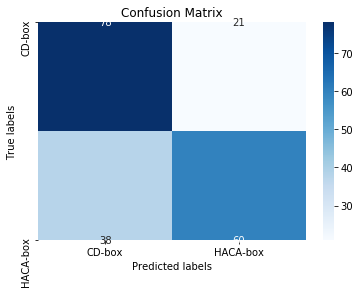

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt  

classes = ["CD-box", "HACA-box"]
df_confmat = pd.DataFrame(conf_mat, columns=df_balanced.Label.unique(), index=df_balanced.Label.unique())

ax= plt.subplot()

sns.heatmap(df_confmat, annot=True, ax=ax, cmap="Blues"); #annot=True to annotate cells

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')

plt.show()

So now that we have established a (maybe crude) baseline for our classification problem let's create a simple CNN and find out if this will improve our scores in the next notebook "02_first_CNN"